In [3]:
# Install and import nltk
!pip install nltk
import nltk


In [4]:
# Download the lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [7]:
# warmup sentecne
sentence = "Darth Vader is one of the most powerfull sith lords in the history"
print(sent_analyzer.polarity_scores(sentence))


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [8]:
sentence1 = "Darth Vader the most evil character in entire Star Wars saga"
print(sent_analyzer.polarity_scores(sentence1))

{'neg': 0.48, 'neu': 0.52, 'pos': 0.0, 'compound': -0.8516}


In [9]:
import pandas as pd

# Read the data set
data_url = "https://raw.githubusercontent.com/keitazoumana/VADER_sentiment-Analysis/main/data/testdata.manual.2009.06.14.csv"
sentiment_data = pd.read_csv(data_url)

sentiment_data.head(3)

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...


In [10]:

def format_data(data):

  last_col = str(data.columns[-1])
  first_col = str(data.columns[0])

  data.rename(columns = {last_col: 'tweet_text', first_col: 'polarity'}, inplace=True) 

  # Change 0, 2, 4 to negative, neutral and positive
  labels = {0: 'negative', 2: 'neutral', 4: 'positive'}
  data['polarity'] = data['polarity'].map(labels)

  # Get only the two columns
  return data[['tweet_text', 'polarity']]

# Apply the transformation
data = format_data(sentiment_data)
data.head(3)

,tweet_text,polarity
0,Reading my kindle2... Love it... Lee childs i...,positive
1,"Ok, first assesment of the #kindle2 ...it fuck...",positive
2,@kenburbary You'll love your Kindle2. I've had...,positive


In [11]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
data["vader_prediction"] = data["tweet_text"].apply(predict_sentiment)

# Show 5 random rows of the data
data.sample(5)

C:\Users\janka\AppData\Local\Temp/ipykernel_24328/2786527729.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["vader_prediction"] = data["tweet_text"].apply(predict_sentiment)


,tweet_text,polarity,vader_prediction
473,"dearest @google, you rich bastards! the VISA c...",negative,positive
489,I just created my first LaTeX file from scratc...,negative,positive
427,eating breakfast and then school,neutral,neutral
202,"RT @blknprecious1: RT GREAT @dbroos ""Someone's...",positive,positive
439,argghhhh why won't my jquery appear in safari...,negative,negative


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(data['polarity'], data['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(data['polarity'], data['vader_prediction']))

Accuracy: 0.716297786720322

              precision    recall  f1-score   support

    negative       0.84      0.64      0.72       177
     neutral       0.67      0.70      0.68       139
    positive       0.67      0.81      0.73       181

    accuracy                           0.72       497
   macro avg       0.73      0.71      0.71       497
weighted avg       0.73      0.72      0.72       497



[[0.22736419 0.05030181 0.07847082]
 [0.02012072 0.19517103 0.06438632]
 [0.02414487 0.04627767 0.29376258]]


C:\Users\janka\AppData\Local\Temp/ipykernel_24328/3518594705.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\janka\AppData\Local\Temp/ipykernel_24328/3518594705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


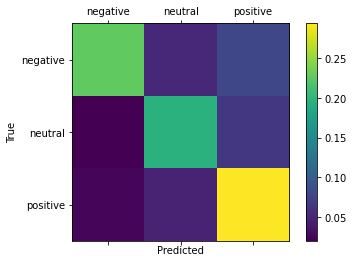

In [15]:
import matplotlib.pyplot as plt
std = confusion_matrix(data['polarity'], data['vader_prediction'], normalize="all")
print(std)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(std)
fig.colorbar(cax)
labels = ['negative', 'neutral', 'positive']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()